# Heart Failure Prediction

- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
- Heart failure is a common event caused by CVDs
- People with cardiovascular disease need early detection and management wherein a machine learning model can be of great help.

## Task
- Create a model for predicting mortality caused by Heart Failure

## Dataset

- Dataset source: [https://www.kaggle.com/andrewmvd/heart-failure-clinical-data](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
- The [dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) contains 12 attributes that can be used to predict mortality in heart
diseases. 

## Importing required Libraries

In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

## Loading dataset 

In [3]:
DATA_PATH = os.path.join("dataset")
filename = "heart_failure_clinical_records_dataset.csv"

def load_heart_data(data_path = DATA_PATH, filename = filename):
    csv_path = os.path.join(DATA_PATH, filename)
    return pd.read_csv(csv_path)

## Taking a look at the dataset

In [4]:
heart_failure_data = load_heart_data()
heart_failure_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- The dataset have 12 attributes corresponding to different factors which can be diagonised or observed
- The dataset also consists of a __DEATH_EVENT__ attribute which tells whether these conditions lead to heart failure or not 
- Using the features we will try to train a model which will predict mortality
- Here is feature description (__source__ :[https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1))

![](images/feature_description.png)

In [5]:
heart_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


- This dataset has only 299 instances
- Dataset is very small
- All features are numeric
- No null values in dataset

In [6]:
heart_failure_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


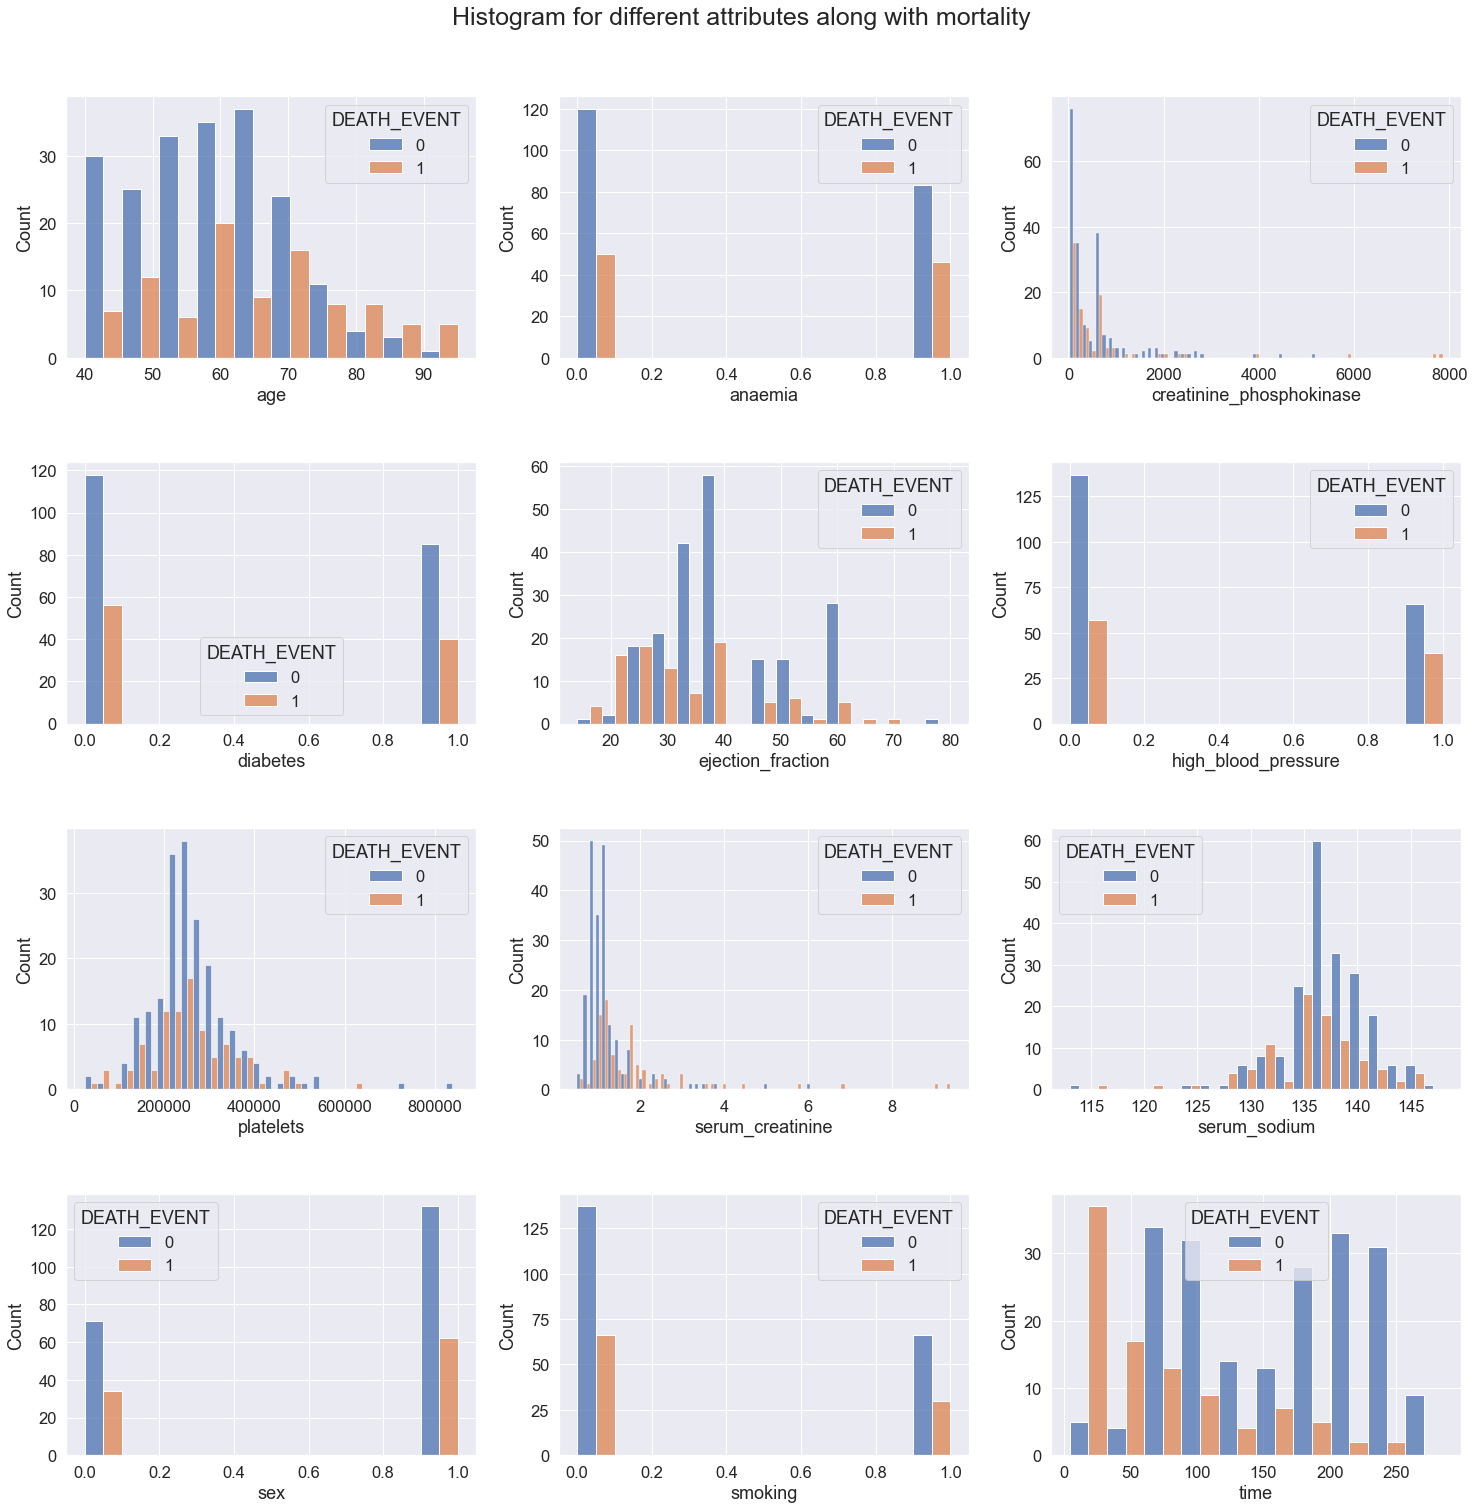

In [7]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(4, 3, figsize=(25, 25))

fig.suptitle('Histogram for different attributes along with mortality', y=0.93, size=25)
for i in range(4):
    for j in range(3):
        sns.histplot(ax = ax[i][j], data=heart_failure_data, x=heart_failure_data.columns[3*i+j], hue="DEATH_EVENT", multiple="dodge")

plt.subplots_adjust(hspace=0.4)


#### Some insights from the above histogram 
- The count of death event is higher people with more *age*
- Count of death event is also higher in people with low *ejection fraction*
- *creatinine_phosphokinase*, *serum_creatinine* and *serum_sodium* also seem to be very important attributes
- Number of people who did not survive is much closer to number of people who did in case of *high blood pressure* 

##### *Time* attribute
- *time* attribute may seem like an important feature in death event prediction but __using the time column as a feature is wrong__
- time is the period after which the person died or were censored  
- When the model is deployed, no end user will be able to provide you the value of time, since they do not know at what time in the future the patient will die/get censored!

In [8]:
heart_failure_data = heart_failure_data.drop("time", axis=1)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

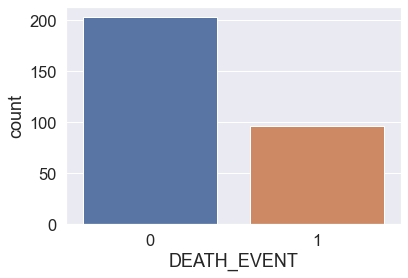

In [9]:
sns.countplot(data=heart_failure_data, x="DEATH_EVENT")

- We can see that the number of instances in one class is almost half of the number of instances in other class
- We have to consider this difference while we proceed forward

## Create a Test Set

- Before looking the data any further we will create a test set and put it aside


- In a dataset this small, a random test set split may lead to sampling bias
- There is a possibility that train set or test set may not get enough instances from both classes of target class(DEATH_EVENT)


- We will be using stratified sampling to ensure that train and test set have proportion of DEATH_EVENTS identical to that of full dataset

In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=50, random_state=42)
for train_index, test_index in split.split(heart_failure_data, heart_failure_data["DEATH_EVENT"]):
    train_set = heart_failure_data.loc[train_index]
    test_set = heart_failure_data.loc[test_index]

<AxesSubplot:title={'center':'test set'}, xlabel='DEATH_EVENT', ylabel='count'>

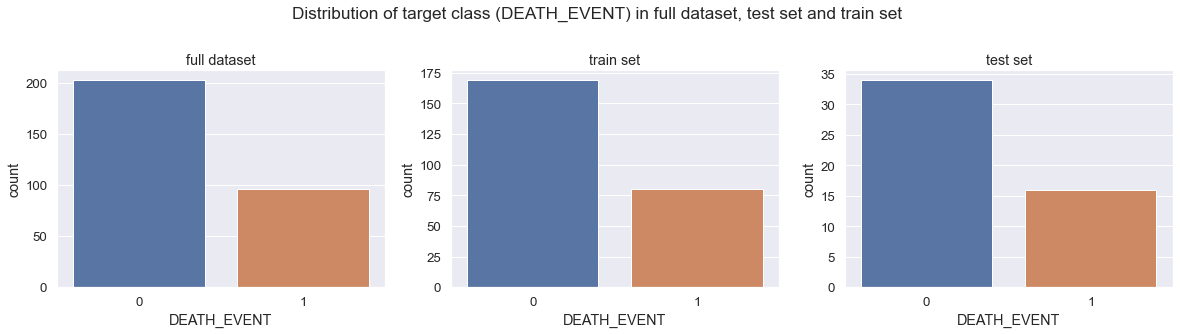

In [11]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(1, 3,  figsize=(20, 4))

fig.suptitle('Distribution of target class (DEATH_EVENT) in full dataset, test set and train set', y=1.1)

ax[0].set_title("full dataset")
sns.countplot(ax = ax[0], data=heart_failure_data, x = "DEATH_EVENT")

ax[1].set_title("train set")
sns.countplot(ax = ax[1], data=train_set, x = "DEATH_EVENT")

ax[2].set_title("test set")
sns.countplot(ax=ax[2], data=test_set, x="DEATH_EVENT")


- The distribution of both target class in test and train set is identical to that of full dataset 

## Looking for Corelations

- Since dataset is small we can easily compute *standard relation coefficient*
- The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation, when the coefficient is close to –1, it means
that there is a strong negative correlation; 

In [12]:
corr_matrix = heart_failure_data.corr()

In [13]:
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
Name: DEATH_EVENT, dtype: float64

- we will be not considering *time* feature
- *serum_creatinine*, *high_blood_pressure*, *age* have stronger positive corelation
- *ejection_fraction* and *serum_sodium* have strong negitive corelation
- corelation matrix only captures linear corelations

- we can also plot a scatterplot matrix for the most promising features

In [14]:
heart = train_set.copy()

In [15]:
attributes = ["serum_creatinine","ejection_fraction", "serum_sodium", "age","high_blood_pressure"]

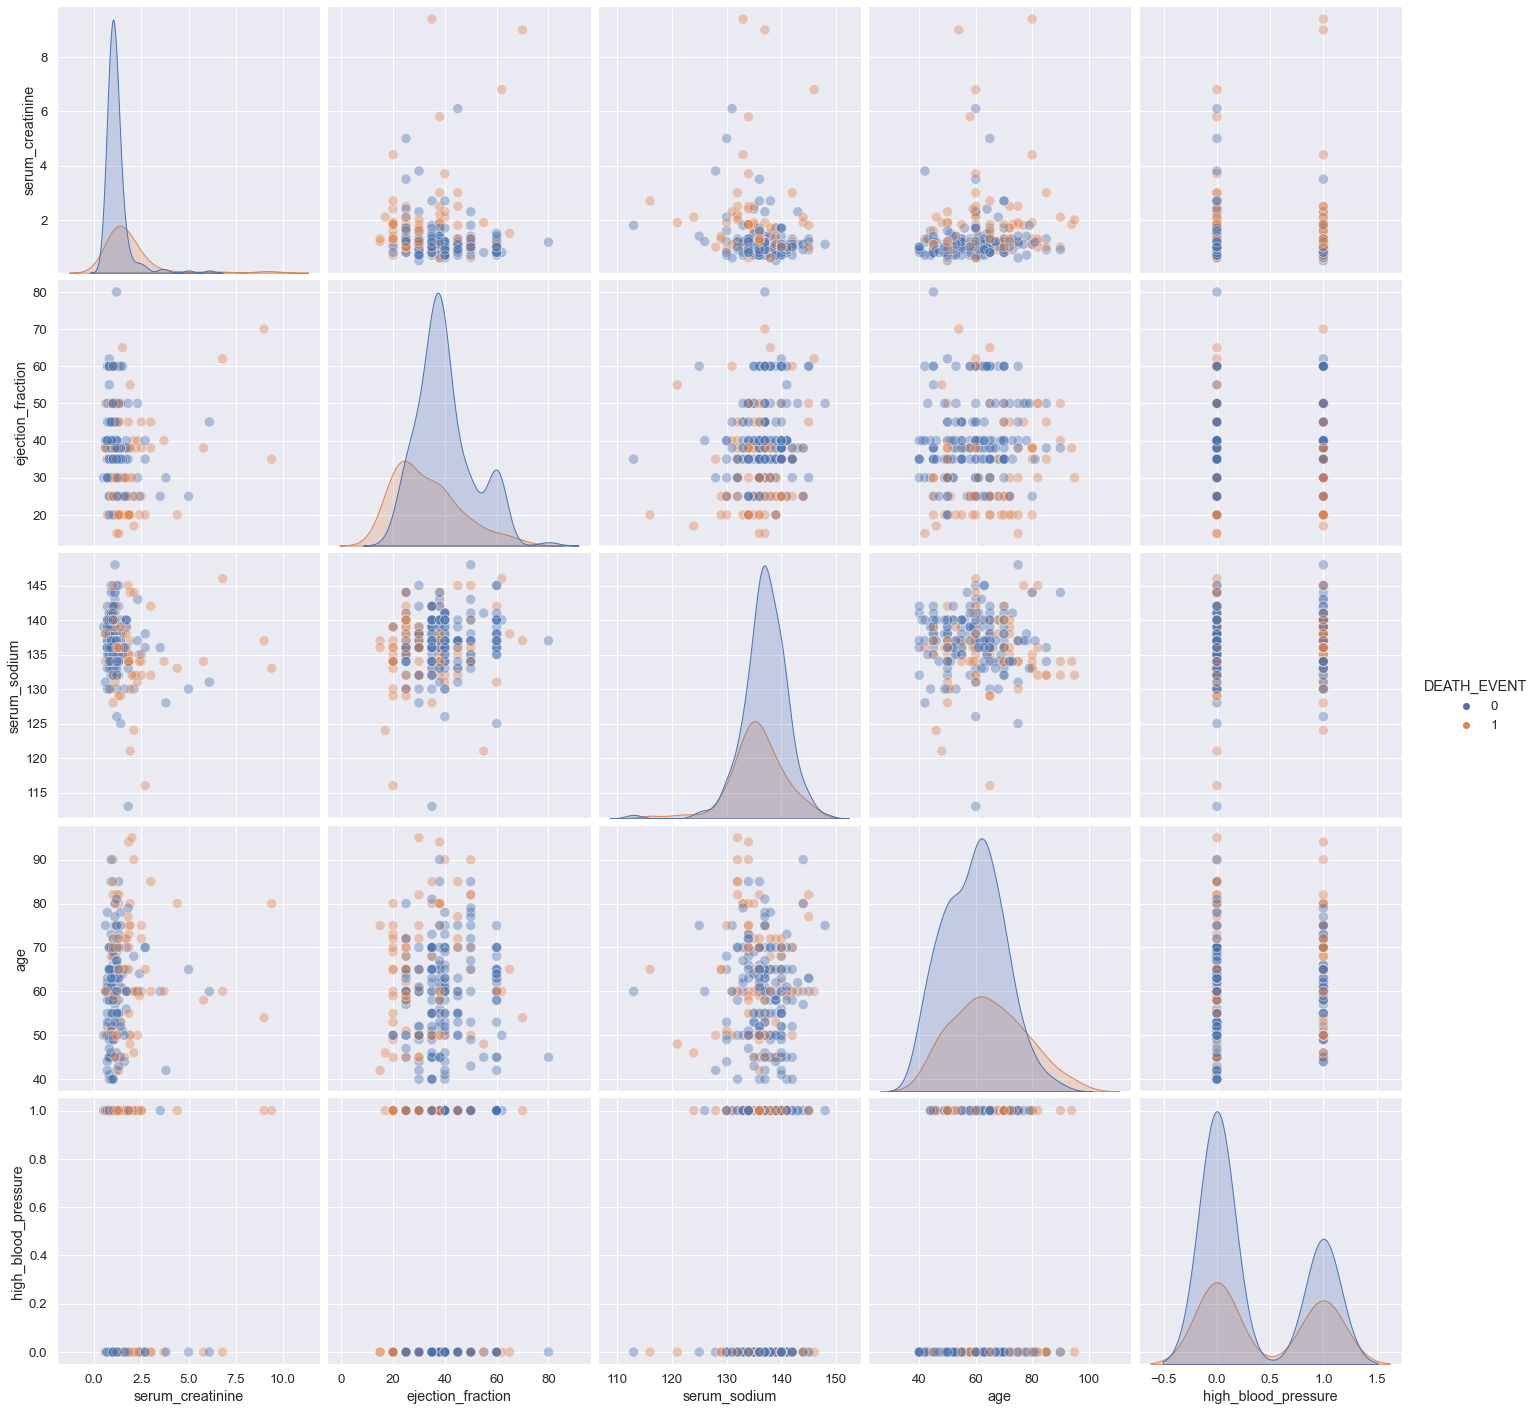

In [16]:
sns.set(font_scale=1.2)
sns.pairplot(
    data=heart,
    x_vars=attributes,
    y_vars=attributes,
    hue="DEATH_EVENT",
    kind='scatter', plot_kws={'alpha':0.4, 's':100},
    height=4
)

## Prepare data for machine learning algorithm

### Separate label and predictors

In [17]:
heart_failure = train_set.drop("DEATH_EVENT", axis=1)
heart_failure_labels = train_set["DEATH_EVENT"].copy()

### Transformation pipeline
- Removing *time* attribute 
- Feature scaling of numerical attributes

In [18]:
num_attribs = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
cat_attribs = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']


num_pipeline = Pipeline([
                    ('std_scal', StandardScaler())
                ])
preprocess_pipeline = ColumnTransformer(
            transformers = [
                ('num', num_pipeline, num_attribs),
                ('cat', 'passthrough', cat_attribs),
            ],
            )

In [19]:
heart_failure_tr = preprocess_pipeline.fit_transform(heart_failure)

In [20]:
heart_failure_tr.shape

(249, 11)

## Evaluation Strategy 

- We have already seen that there is a skew in target labels
- So, comparing different models only on the basis of accuracy is not a good idea
- Along with accuracy, we also have to take other scoring methods like precision, recall, confusion matrix, f1_score, etc. into consideration for a useful model

##### If we cosider the task for which we are training the machine learning model:
- We are going to predict heart failure in people with cardiovascular diseases
- Since, it is a matter of life and death: we can afford false alerts but most of the cases in which person might die should be predicted correctly
- it is probably fine if the classifier has low precision as long it has high **recall**
- Sure, threre will be false alerts, but most of the cases in which person may die will get caught
- This will help in early detection and management

## Training Models 

In [21]:
evaluation_data = pd.DataFrame(columns=["model","train_accuracy", "cross_val_accuracy", "confusion_matrix", "precision", "recall", "f1_score", "roc_auc"])

def trainAndEval(model,name, X_train=heart_failure, y_train=heart_failure_labels, scaling=True):
    if(scaling):
        X_train = preprocess_pipeline.fit_transform(X_train)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_cross_val_predict = cross_val_predict(model, X_train, y_train, cv=5)
    evaluation = {'model':name,
                  'train_accuracy':accuracy_score(y_train, y_train_pred), 
                  'cross_val_accuracy':np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")), 
                  'confusion_matrix':confusion_matrix(y_train, y_cross_val_predict), 
                  'precision':precision_score(y_train, y_cross_val_predict),
                  'recall':recall_score(y_train, y_cross_val_predict),
                  'f1_score':f1_score(y_train, y_cross_val_predict),
                  'roc_auc':roc_auc_score(y_train, y_cross_val_predict)}
    return evaluation

- Before training different classification algorithms, let us train a dummy model which returns majority class for every instance for some accuracy benchmarks

#### Dummy Model 
- A dummy model which always returns majority ('0') class

In [22]:
from sklearn.base import BaseEstimator

class Always0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=np.int64)
    
always0 = Always0Classifier()
trainAndEval(always0, 'always0')

C:\Users\Siddhant\.conda\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'model': 'always0',
 'train_accuracy': 0.678714859437751,
 'cross_val_accuracy': 0.678612244897959,
 'confusion_matrix': array([[169,   0],
        [ 80,   0]], dtype=int64),
 'precision': 0.0,
 'recall': 0.0,
 'f1_score': 0.0,
 'roc_auc': 0.5}

In [23]:
evaluation_data = evaluation_data.append(trainAndEval(always0, 'always0'), ignore_index=True)

C:\Users\Siddhant\.conda\envs\data_science\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Logistic Regression

In [24]:
log_reg = LogisticRegression()
trainAndEval(log_reg, 'LogisticRegression')

{'model': 'LogisticRegression',
 'train_accuracy': 0.7710843373493976,
 'cross_val_accuracy': 0.7226938775510205,
 'confusion_matrix': array([[151,  18],
        [ 51,  29]], dtype=int64),
 'precision': 0.6170212765957447,
 'recall': 0.3625,
 'f1_score': 0.4566929133858268,
 'roc_auc': 0.6279955621301775}

- There is some overfitting
- low recall and f1 score

In [25]:
evaluation_data = evaluation_data.append(trainAndEval(log_reg, 'LogisticRegression'), ignore_index=True)

#### K-Nearest Neighbor

In [26]:
knn_classifier = KNeighborsClassifier()
# evaluation_data = evaluation_data.append(trainAndEval(knn_classifier), ignore_index=True)
trainAndEval(knn_classifier, 'knn')

{'model': 'knn',
 'train_accuracy': 0.7791164658634538,
 'cross_val_accuracy': 0.6787755102040817,
 'confusion_matrix': array([[149,  20],
        [ 60,  20]], dtype=int64),
 'precision': 0.5,
 'recall': 0.25,
 'f1_score': 0.3333333333333333,
 'roc_auc': 0.5658284023668639}

- overfitting
- low recall and f1 score

In [27]:
evaluation_data = evaluation_data.append(trainAndEval(knn_classifier, 'knn'), ignore_index=True)

#### LinearSVC

In [28]:
lin_svm_clf = LinearSVC(loss="hinge",max_iter=10000, C=1)
trainAndEval(lin_svm_clf, "LinearSVC")

{'model': 'LinearSVC',
 'train_accuracy': 0.7791164658634538,
 'cross_val_accuracy': 0.7508571428571429,
 'confusion_matrix': array([[153,  16],
        [ 46,  34]], dtype=int64),
 'precision': 0.68,
 'recall': 0.425,
 'f1_score': 0.5230769230769231,
 'roc_auc': 0.6651627218934911}

- less overfitting than above models
- better performance on f1 score, precision and recall than above models
- Still number of false negatives is more than true positives

In [29]:
evaluation_data = evaluation_data.append(trainAndEval(lin_svm_clf, 'LinearSVC'), ignore_index=True)

#### SVC(kernel="poly")

In [30]:
svm_classifier = SVC(C=0.8, kernel="poly")
trainAndEval(svm_classifier, 'SVC(kernel="poly")')

{'model': 'SVC(kernel="poly")',
 'train_accuracy': 0.8152610441767069,
 'cross_val_accuracy': 0.7188571428571429,
 'confusion_matrix': array([[160,   9],
        [ 61,  19]], dtype=int64),
 'precision': 0.6785714285714286,
 'recall': 0.2375,
 'f1_score': 0.35185185185185186,
 'roc_auc': 0.5921227810650888}

- overfitting
- as we try to reduce overfitting model becomes more closer to the dummy model
- low recall and f1_Score

In [31]:
evaluation_data = evaluation_data.append(trainAndEval(svm_classifier, 'SVC(kernel="poly")'), ignore_index=True)

#### SVC(kernel="rbf")

In [32]:
svm_classifier = SVC(kernel="rbf",C=0.4)
trainAndEval(svm_classifier, 'SVC(kernel="rbf")')

{'model': 'SVC(kernel="rbf")',
 'train_accuracy': 0.7951807228915663,
 'cross_val_accuracy': 0.730857142857143,
 'confusion_matrix': array([[161,   8],
        [ 59,  21]], dtype=int64),
 'precision': 0.7241379310344828,
 'recall': 0.2625,
 'f1_score': 0.38532110091743116,
 'roc_auc': 0.6075813609467455}

- performance similar to SVC(kernel="poly")

In [33]:
evaluation_data = evaluation_data.append(trainAndEval(svm_classifier, 'SVC(kernel="rbf")'), ignore_index=True)

#### Decision Tree 

In [34]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=6)
trainAndEval(tree_clf, "Decision Tree", scaling=False)

{'model': 'Decision Tree',
 'train_accuracy': 0.8192771084337349,
 'cross_val_accuracy': 0.7587755102040817,
 'confusion_matrix': array([[143,  26],
        [ 34,  46]], dtype=int64),
 'precision': 0.6388888888888888,
 'recall': 0.575,
 'f1_score': 0.6052631578947367,
 'roc_auc': 0.710576923076923}

- Some overfitting
- Performance better than most of the above models

In [35]:
evaluation_data = evaluation_data.append(trainAndEval(tree_clf, 'DecisionTree'), ignore_index=True)

#### Random Forest

In [36]:
rnd_forest_classifier = RandomForestClassifier(max_leaf_nodes=6,n_jobs=-1, random_state=42)
trainAndEval(rnd_forest_classifier, "random forest", scaling=False)

{'model': 'random forest',
 'train_accuracy': 0.8192771084337349,
 'cross_val_accuracy': 0.7508571428571429,
 'confusion_matrix': array([[157,  12],
        [ 50,  30]], dtype=int64),
 'precision': 0.7142857142857143,
 'recall': 0.375,
 'f1_score': 0.4918032786885245,
 'roc_auc': 0.6519970414201184}

- low recall and f1 score
- some overfitting

In [37]:
evaluation_data = evaluation_data.append(trainAndEval(rnd_forest_classifier, 'Random Forest Classifier', scaling=False), ignore_index=True)

#### Neural Network 

In [88]:
X_train = heart_failure
y_train = heart_failure_labels

nn_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


In [89]:
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [90]:
nn_model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [92]:
history = nn_model.fit(X_train, y_train, epochs=20, validation_split = 0.2)

Epoch 1/20
7/7 [==============================] - 1s 45ms/step - loss: 56465657856.0000 - accuracy: 0.5829 - val_loss: 0.6888 - val_accuracy: 0.6600
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6874 - accuracy: 0.6834 - val_loss: 0.6871 - val_accuracy: 0.6600
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6854 - accuracy: 0.6834 - val_loss: 0.6853 - val_accuracy: 0.6600
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6833 - accuracy: 0.6834 - val_loss: 0.6840 - val_accuracy: 0.6600
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6819 - accuracy: 0.6834 - val_loss: 0.6826 - val_accuracy: 0.6600
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6803 - accuracy: 0.6834 - val_loss: 0.6812 - val_accuracy: 0.6600
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6787 - accuracy: 0.6834 - val_loss: 0.6801 - val_accuracy: 0.6600
Epoch 8/20
7/7 [=

- Neural Network does not seem to perform good enough
- low accuracy

### Evaluation data

In [93]:
evaluation_data

,model,train_accuracy,cross_val_accuracy,confusion_matrix,precision,recall,f1_score,roc_auc
0,always0,0.678715,0.678612,"[[169, 0], [80, 0]]",0.000000,0.0000,0.000000,0.500000
1,LogisticRegression,0.771084,0.722694,"[[151, 18], [51, 29]]",0.617021,0.3625,0.456693,0.627996
2,knn,0.779116,0.678776,"[[149, 20], [60, 20]]",0.500000,0.2500,0.333333,0.565828
3,LinearSVC,0.779116,0.750857,"[[153, 16], [46, 34]]",0.680000,0.4250,0.523077,0.665163
4,"SVC(kernel=""poly"")",0.815261,0.718857,"[[160, 9], [61, 19]]",0.678571,0.2375,0.351852,0.592123
5,"SVC(kernel=""rbf"")",0.795181,0.730857,"[[161, 8], [59, 21]]",0.724138,0.2625,0.385321,0.607581
6,DecisionTree,0.819277,0.758776,"[[143, 26], [34, 46]]",0.638889,0.5750,0.605263,0.710577
7,Random Forest Classifier,0.819277,0.750857,"[[157, 12], [50, 30]]",0.714286,0.3750,0.491803,0.651997


- From all these models Decision Tree seems to have outperformed every other model
- Lets see if we can better results if we tweek some hyperparameters in Decision Trees

### Decision Tree

In [118]:
tree_clf = DecisionTreeClassifier()

In [119]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=6)
trainAndEval(tree_clf, "Decision Tree", scaling=False)

{'model': 'Decision Tree',
 'train_accuracy': 0.8192771084337349,
 'cross_val_accuracy': 0.7587755102040817,
 'confusion_matrix': array([[143,  26],
        [ 34,  46]], dtype=int64),
 'precision': 0.6388888888888888,
 'recall': 0.575,
 'f1_score': 0.6052631578947367,
 'roc_auc': 0.710576923076923}

#### Grid Search CV

In [120]:
X_train = heart_failure
y_train = heart_failure_labels

param_grid = [
    {'criterion': ['gini', 'entropy'], 'max_leaf_nodes': range(2,15), 'max_features': range(3, 12), 'min_impurity_decrease': [0, 0.01, 0.05, 0.1]}
]

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf, param_grid, cv=5,
                          scoring = "recall", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': range(3, 12),
                          'max_leaf_nodes': range(2, 15),
                          'min_impurity_decrease': [0, 0.01, 0.05, 0.1]}],
             return_train_score=True, scoring='recall')

In [121]:
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_features': 8,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.01}

In [122]:
grid_search.best_score_

0.7125

In [123]:
y_pred = grid_search.best_estimator_.predict(X_train)

In [124]:
def Eval(y_train, y_pred):
    eval = {'accuracy': accuracy_score(y_train, y_pred),
           'confusion metrics': confusion_matrix(y_train, y_pred),
           'precision': precision_score(y_train, y_pred),
           'recall': recall_score(y_train, y_pred),
           'f1_score': f1_score(y_train, y_pred),
           'ROC_AUC': roc_auc_score(y_train, y_pred)}
    return eval

In [125]:
Eval(y_train, y_pred)

{'accuracy': 0.8152610441767069,
 'confusion metrics': array([[143,  26],
        [ 20,  60]], dtype=int64),
 'precision': 0.6976744186046512,
 'recall': 0.75,
 'f1_score': 0.7228915662650603,
 'ROC_AUC': 0.7980769230769231}

In [126]:
final_classifier = grid_search.best_estimator_

## Evaluating on test set

In [127]:
X_test = test_set.drop("DEATH_EVENT", axis=1)
y_test = test_set["DEATH_EVENT"].copy()

In [128]:
y_test_pred = final_classifier.predict(X_test)

Eval(y_test, y_test_pred)

{'accuracy': 0.78,
 'confusion metrics': array([[29,  5],
        [ 6, 10]], dtype=int64),
 'precision': 0.6666666666666666,
 'recall': 0.625,
 'f1_score': 0.6451612903225806,
 'ROC_AUC': 0.7389705882352942}